In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy
import requests
from config import weather_api_key
from datetime import datetime
from scipy.stats import linregress

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(-90.000, 90.000, size=1500)
lngs = np.random.uniform(-180.000, 180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Create a list for holding the cities.
cities = []

# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
     # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

610

In [5]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
# print(url)

In [6]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | kaitangata
Processing Record 2 of Set 1 | atuona
Processing Record 3 of Set 1 | hailar
Processing Record 4 of Set 1 | duki
Processing Record 5 of Set 1 | banda aceh
Processing Record 6 of Set 1 | ushuaia
Processing Record 7 of Set 1 | tooele
Processing Record 8 of Set 1 | guerrero negro
Processing Record 9 of Set 1 | torbay
Processing Record 10 of Set 1 | bocana de paiwas
Processing Record 11 of Set 1 | pergamino
Processing Record 12 of Set 1 | puerto ayora
Processing Record 13 of Set 1 | rikitea
Processing Record 14 of Set 1 | kawalu
Processing Record 15 of Set 1 | tilichiki
Processing Record 16 of Set 1 | nahavand
Processing Record 17 of Set 1 | port alfred
Processing Record 18 of Set 1 | tiznit
Processing Record 19 of Set 1 | manzil tamim
City not found. Skipping...
Processing Record 20 of Set 1 | jamestown
Processing Record 21 of Set 1 | upernavik
Processing Record 22 of Set 1 | isangel
Proce

Processing Record 39 of Set 4 | maxixe
Processing Record 40 of Set 4 | cherskiy
Processing Record 41 of Set 4 | portland
Processing Record 42 of Set 4 | provideniya
Processing Record 43 of Set 4 | meulaboh
Processing Record 44 of Set 4 | luwuk
Processing Record 45 of Set 4 | boulsa
Processing Record 46 of Set 4 | kapaa
Processing Record 47 of Set 4 | constitucion
Processing Record 48 of Set 4 | kyzyl-suu
Processing Record 49 of Set 4 | kajaani
Processing Record 50 of Set 4 | batagay-alyta
Processing Record 1 of Set 5 | talaya
Processing Record 2 of Set 5 | beloha
Processing Record 3 of Set 5 | kalawit
Processing Record 4 of Set 5 | hailey
Processing Record 5 of Set 5 | husavik
Processing Record 6 of Set 5 | srednekolymsk
Processing Record 7 of Set 5 | centralia
Processing Record 8 of Set 5 | sao joao do paraiso
Processing Record 9 of Set 5 | port elizabeth
Processing Record 10 of Set 5 | grand river south east
City not found. Skipping...
Processing Record 11 of Set 5 | kashi
Processing

Processing Record 27 of Set 8 | ancud
Processing Record 28 of Set 8 | novyy urengoy
Processing Record 29 of Set 8 | wanxian
Processing Record 30 of Set 8 | zabol
Processing Record 31 of Set 8 | port blair
Processing Record 32 of Set 8 | kilindoni
Processing Record 33 of Set 8 | kasiri
Processing Record 34 of Set 8 | nuristan
Processing Record 35 of Set 8 | sibu
Processing Record 36 of Set 8 | myskhako
Processing Record 37 of Set 8 | dolores
Processing Record 38 of Set 8 | tessalit
Processing Record 39 of Set 8 | sitka
Processing Record 40 of Set 8 | mullaitivu
City not found. Skipping...
Processing Record 41 of Set 8 | mathbaria
Processing Record 42 of Set 8 | harrismith
Processing Record 43 of Set 8 | pudozh
Processing Record 44 of Set 8 | ilulissat
Processing Record 45 of Set 8 | broken hill
Processing Record 46 of Set 8 | qinhuangdao
Processing Record 47 of Set 8 | milkovo
Processing Record 48 of Set 8 | polunochnoye
Processing Record 49 of Set 8 | aklavik
Processing Record 50 of Se

Processing Record 17 of Set 12 | maple creek
Processing Record 18 of Set 12 | filadelfia
Processing Record 19 of Set 12 | kabinda
Processing Record 20 of Set 12 | burnie
Processing Record 21 of Set 12 | coruripe
Processing Record 22 of Set 12 | bayan
Processing Record 23 of Set 12 | alberton
Processing Record 24 of Set 12 | severodvinsk
Processing Record 25 of Set 12 | kamskoye ustye
Processing Record 26 of Set 12 | antalaha
Processing Record 27 of Set 12 | ballitoville
Processing Record 28 of Set 12 | terenos
Processing Record 29 of Set 12 | malwan
City not found. Skipping...
Processing Record 30 of Set 12 | besikduzu
Processing Record 31 of Set 12 | tabulbah
City not found. Skipping...
Processing Record 32 of Set 12 | belaya gora
Processing Record 33 of Set 12 | isabela
Processing Record 34 of Set 12 | kadi
Processing Record 35 of Set 12 | dno
Processing Record 36 of Set 12 | cabo rojo
Processing Record 37 of Set 12 | kalmunai
Processing Record 38 of Set 12 | dehloran
Processing Reco

In [7]:
len(city_data)

566

In [8]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Kaitangata,-46.2817,169.8464,44.26,87,78,4.61,NZ,2021-09-20 18:23:45
1,Atuona,-9.8000,-139.0333,77.56,75,74,21.12,PF,2021-09-20 18:23:45
2,Hailar,49.2000,119.7000,49.73,75,100,6.78,CN,2021-09-20 18:23:45
3,Duki,30.1541,68.5728,85.17,32,0,5.97,PK,2021-09-20 18:23:45
4,Banda Aceh,5.5577,95.3222,79.11,78,99,8.97,ID,2021-09-20 18:23:46
5,Ushuaia,-54.8000,-68.3000,47.82,65,90,10.36,AR,2021-09-20 18:20:54
6,Tooele,40.5308,-112.2983,57.85,47,1,8.05,US,2021-09-20 18:23:46
7,Guerrero Negro,27.9769,-114.0611,76.77,56,0,10.27,MX,2021-09-20 18:23:46
8,Torbay,47.6666,-52.7314,48.97,76,75,25.32,CA,2021-09-20 18:23:46
9,Bocana De Paiwas,12.7857,-85.1227,83.89,74,84,10.49,NI,2021-09-20 18:23:46


In [9]:
new_column_order = ['City', 'Country', 'Date', 'Lat', 'Lng', 'Max Temp', 'Humidity', 'Cloudiness', 'Wind Speed']
city_data_df = city_data_df[new_column_order]

In [10]:
city_data_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Kaitangata,NZ,2021-09-20 18:23:45,-46.2817,169.8464,44.26,87,78,4.61
1,Atuona,PF,2021-09-20 18:23:45,-9.8000,-139.0333,77.56,75,74,21.12
2,Hailar,CN,2021-09-20 18:23:45,49.2000,119.7000,49.73,75,100,6.78
3,Duki,PK,2021-09-20 18:23:45,30.1541,68.5728,85.17,32,0,5.97
4,Banda Aceh,ID,2021-09-20 18:23:46,5.5577,95.3222,79.11,78,99,8.97


In [11]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [12]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df['Lat']
max_temps = city_data_df['Max Temp']
humidity = city_data_df['Humidity']
cloudiness = city_data_df['Cloudiness']
wind_speed = city_data_df['Wind Speed']

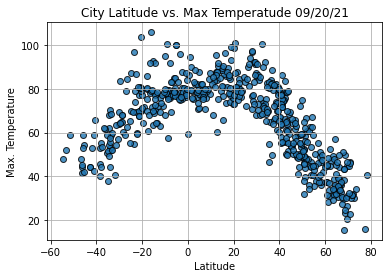

In [13]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
           max_temps,
           edgecolors='black', linewidths=1, marker='o',
           alpha=0.8, label='Cities')

# Incorporate the other graph properties.
plt.title(f'City Latitude vs. Max Temperatude ' + time.strftime('%x'))
plt.xlabel('Latitude')
plt.ylabel('Max. Temperature')
plt.grid(True)

# Save the fig
plt.savefig('weather_data/Fig1.png')

# Show plot
plt.show()


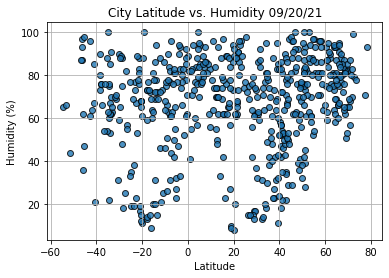

In [14]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

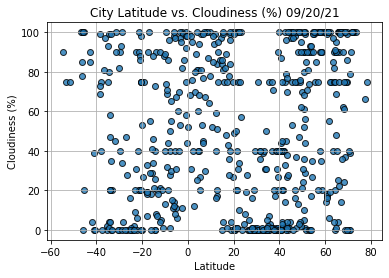

In [15]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

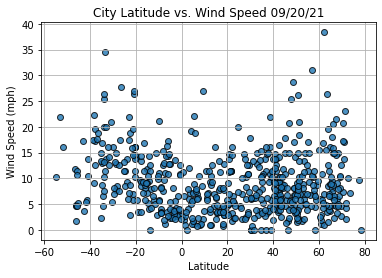

In [16]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [17]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [18]:
index13 = city_data_df.loc[13]
index13

City                       Kawalu
Country                        ID
Date          2021-09-20 18:23:47
Lat                       -7.3817
Lng                      108.2082
Max Temp                    69.44
Humidity                       96
Cloudiness                     55
Wind Speed                   1.07
Name: 13, dtype: object

In [19]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

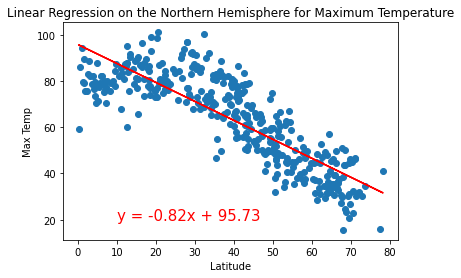

In [20]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Max Temp']

# Call the function
plot_linear_regression(x_values, y_values, 'Linear Regression on the Northern Hemisphere for Maximum Temperature',\
                       'Max Temp',(10,20))

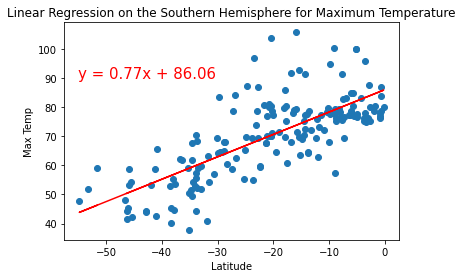

In [21]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Max Temp']

# Call the function
plot_linear_regression(x_values, y_values, 'Linear Regression on the Southern Hemisphere for Maximum Temperature',\
                       'Max Temp',(-55,90))

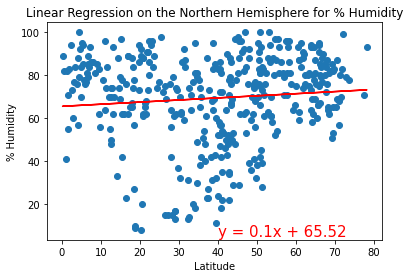

In [22]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for % Humidity', '% Humidity',(40,5))

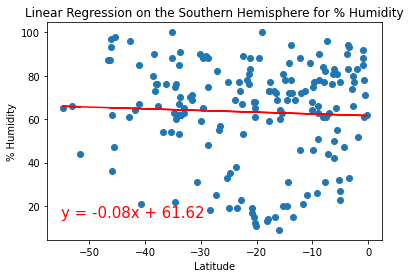

In [23]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for % Humidity', '% Humidity',(-55,15))

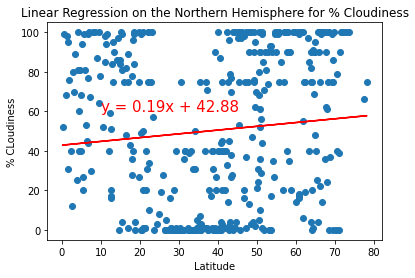

In [24]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for % Cloudiness', '% CLoudiness',(10, 60))

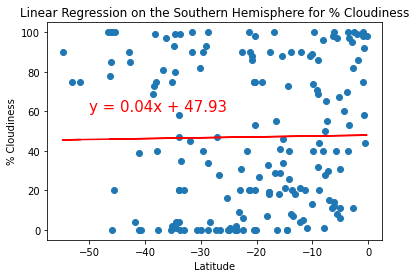

In [25]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for % Cloudiness', '% Cloudiness',(-50,60))

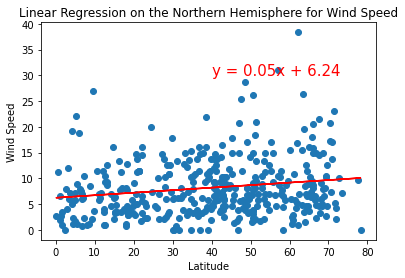

In [26]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for Wind Speed', 'Wind Speed',(40,30))

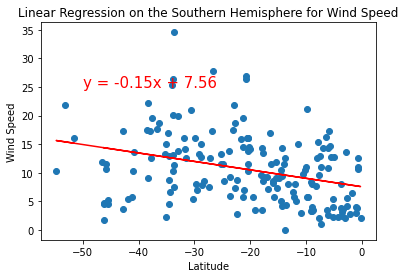

In [27]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for Wind Speed', 'Wind Speed',(-50,25))